# MLE for Poisson Distribution

In this notebook you will perform [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood), or MLE, for the parameter $\lambda$ in the [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution) distribution and bootstrap the results.

## Problem description

Your exercise is to perform the following steps in this notebook:

* Find the probability density function, $P(k \mid \lambda)$ for a single variate on Wikipedia and typeset it into a markdown cell. In that same markdown cell, compose a few sentences that describes the equation and defines all of its symbols.
* Work out the log-likelihood $ln\mathcal{L}(\lambda \mid k)$ and typeset it into another markdown cell. In that same markdown cell, compose a few sentences that describes the equation and defines all of its symbols.
* Pick master, known values for the parameters $\theta=\lambda$ of the distribution and generate an array of `50` random variates using those parameters.
* Make an appropriately labeled Seaborn `countplot` of your dataset.
* Write a Python function, `neg_log_llh(theta, data)`, that returns the negative log-likelihood for the full dataset and estimated $\hat{\theta}=\hat{\lambda}$.
* Use `interact` to print the value of the negative log-likelihood with a slider for $\hat{\lambda}$. Find the value of $\hat{\lambda}$ that minimize the negative log-likelihood by simply moving the slider around. Write some text in a markdown cell that summarizes your findings.
* Write a function, `mle(data)`, that uses `scipy.optimize.minimize` to find the estimated parameters $\hat{\theta}$ that minimize the negative log-likelihood for the data.
* Bootstrap your dataset and compute bootstrapped $\hat{\theta}$ distributions and 95% confidence intervals. Plot your $\hat{\theta}$ distribution using a Seaborn `distplot`.
* Follow [PEP8](https://www.python.org/dev/peps/pep-0008/) and write a properly formatted [docstring](https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt) for all of your functions.
* Add additional markdown cells that describe your code and results.

## Your solution

$P(k \mid \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$

The average number of events in an interval is designated  \lambda  (lambda). Lambda is the event rate, also called the rate parameter. The probability of observing k events in an interval is given by the equation

$ln\mathcal{L}(\lambda \mid k) = ln(\lambda^k e ^ {-\lambda}) - ln(k!)$

$ln\mathcal{L}(\lambda \mid k) = \sum\limits^n_{i=1}x_i \text{ log }\lambda-n\lambda$

In [38]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from ipywidgets import interact
from scipy.optimize import minimize
import math

In [39]:
lam = 1.0
n = 50
rand_data = np.random.poisson(lam, size=n)
print(rand_data)

[2 1 0 2 0 1 0 1 0 0 1 0 1 2 1 0 0 1 0 0 2 0 1 1 1 0 1 2 0 0 2 0 1 1 1 1 0
 1 1 0 2 1 3 2 2 1 1 0 0 1]


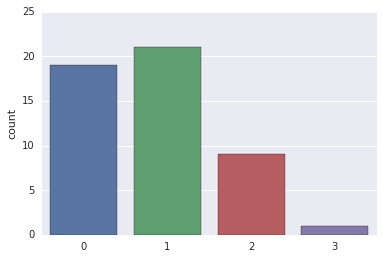

In [40]:
sns.countplot(rand_data)

In [47]:
def neg_log_llh(lam, data):
    """Return the negative log-likelihood for the poisson distribution.
    
    Parameters
    ----------
    lam: float
        The lambda parameter of the poisson distribution.
    data: ndarray
        An array of data points that are being modelled by the poisson distribution.
    """
    n = len(data)
    #result = -1 * sum(data) * np.log(lam) - n * lam
    result = sum([-1 * np.log(lam ** k * np.e ** (-lam)) - np.log(math.factorial(k)) for k in data])
    return result

In [48]:
def print_log_llh(lam):
    """Print the negative log-likelihood for the poisson distribution.
    
    Parameters
    ----------
    lam: float
        Lambda of the poisson distribution.

    """
    print(neg_log_llh(lam, rand_data))

In [49]:
interact(print_log_llh, lam=(0.0,10.0, 0.1));

170.222037291


A lambda value of 0.3 will give the minimized negative log.

In [50]:
def mle(data):
    """Find the estimated parameters lambda that minimize the negative log-likelihood for the data.
    
    Parameters
    ----------
    data: ndarray of integers
        Ndarray of the parameters of the poisson distribution.
    """
    return minimize(lambda lam: neg_log_llh(lam, data), [0.2]).x

Confidence Interval 0.56049001232 0.579110002829


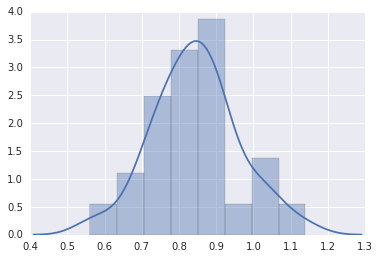

In [58]:
bootstrap = [mle(np.random.choice(rand_data,50)) for i in range(50)]
d = np.array([i[0] for i in bootstrap])
sns.distplot(d);
print("Confidence Interval", np.percentile(d, .025), np.percentile(d, .975))

## Grading

YOUR ANSWER HERE